In [10]:
import pandas as pd

In [11]:
data_train = pd.read_table('train.tsv')

data_train

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


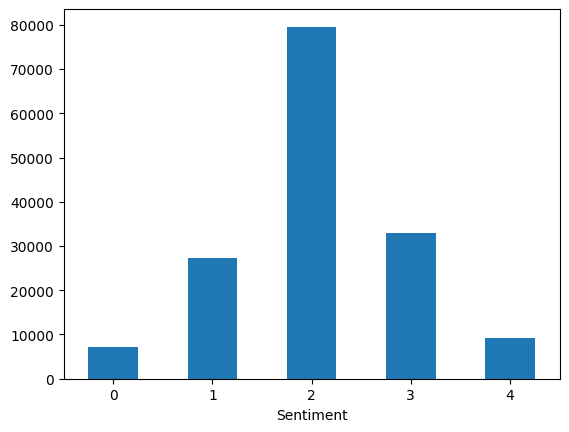

In [13]:
import matplotlib.pyplot as plt
data_train.Sentiment.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X = data_train['Phrase']
y = data_train['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive'])
print(report)

                   precision    recall  f1-score   support

         negative       0.59      0.19      0.29      1416
somewhat negative       0.52      0.35      0.42      5527
          neutral       0.66      0.88      0.76     15639
somewhat positive       0.56      0.46      0.51      6707
         positive       0.62      0.26      0.36      1923

         accuracy                           0.63     31212
        macro avg       0.59      0.43      0.47     31212
     weighted avg       0.61      0.63      0.60     31212



In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
report_nb = classification_report(y_test, y_pred_nb, target_names=['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive'])
print(report_nb)

                   precision    recall  f1-score   support

         negative       0.69      0.04      0.08      1416
somewhat negative       0.52      0.17      0.26      5527
          neutral       0.58      0.94      0.72     15639
somewhat positive       0.55      0.32      0.40      6707
         positive       0.66      0.07      0.13      1923

         accuracy                           0.57     31212
        macro avg       0.60      0.31      0.32     31212
     weighted avg       0.57      0.57      0.50     31212



In [16]:
from sklearn.svm import LinearSVC

# Train a Support Vector Machine (SVM) model
svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
report_svm = classification_report(y_test, y_pred_svm, target_names=['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive'])
print(report_svm)

c:\Users\AI lab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


                   precision    recall  f1-score   support

         negative       0.56      0.22      0.32      1416
somewhat negative       0.52      0.36      0.42      5527
          neutral       0.67      0.87      0.75     15639
somewhat positive       0.55      0.46      0.50      6707
         positive       0.59      0.29      0.39      1923

         accuracy                           0.62     31212
        macro avg       0.58      0.44      0.48     31212
     weighted avg       0.61      0.62      0.60     31212



In [17]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
report_rf = classification_report(y_test, y_pred_rf, target_names=['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive'])
print(report_rf)

                   precision    recall  f1-score   support

         negative       0.46      0.33      0.38      1416
somewhat negative       0.54      0.40      0.46      5527
          neutral       0.68      0.84      0.75     15639
somewhat positive       0.56      0.45      0.50      6707
         positive       0.50      0.36      0.42      1923

         accuracy                           0.62     31212
        macro avg       0.55      0.48      0.50     31212
     weighted avg       0.61      0.62      0.61     31212



In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

X_train_count = X_train_count.toarray()
X_test_count = X_test_count.toarray()


In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_count, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_count)

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive'])
print(report)

                   precision    recall  f1-score   support

         negative       0.55      0.26      0.35      1416
somewhat negative       0.53      0.35      0.42      5527
          neutral       0.67      0.88      0.76     15639
somewhat positive       0.57      0.45      0.50      6707
         positive       0.59      0.34      0.43      1923

         accuracy                           0.63     31212
        macro avg       0.58      0.45      0.49     31212
     weighted avg       0.61      0.63      0.60     31212



In [22]:

nb_model = MultinomialNB()
nb_model.fit(X_train_count, y_train)

# Make predictions on the test data
y_pred_nb = nb_model.predict(X_test_count)

# Evaluate the model
report_nb = classification_report(y_test, y_pred_nb, target_names=['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive'])
print(report_nb)

                   precision    recall  f1-score   support

         negative       0.49      0.27      0.35      1416
somewhat negative       0.50      0.32      0.39      5527
          neutral       0.65      0.86      0.74     15639
somewhat positive       0.55      0.42      0.48      6707
         positive       0.54      0.33      0.41      1923

         accuracy                           0.61     31212
        macro avg       0.55      0.44      0.47     31212
     weighted avg       0.59      0.61      0.58     31212



In [23]:


# Train a Support Vector Machine (SVM) model
svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train_count, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_count)

# Evaluate the model
report_svm = classification_report(y_test, y_pred_svm, target_names=['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive'])
print(report_svm)

c:\Users\AI lab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\AI lab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                   precision    recall  f1-score   support

         negative       0.54      0.27      0.36      1416
somewhat negative       0.52      0.31      0.39      5527
          neutral       0.65      0.89      0.75     15639
somewhat positive       0.56      0.39      0.46      6707
         positive       0.55      0.34      0.42      1923

         accuracy                           0.62     31212
        macro avg       0.57      0.44      0.48     31212
     weighted avg       0.60      0.62      0.59     31212

